<font size=6>**#1 - Regressão Linear (parte 2)**</font>

---
---


In [1]:
import pandas as pd
import numpy as np

from tabulate import tabulate

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
table = [['X', 1, 2, 3, 4, 5],
         ['Y', 2, 3, 4, 5, 6]]

print(tabulate(table))

-  -  -  -  -  -
X  1  2  3  4  5
Y  2  3  4  5  6
-  -  -  -  -  -


In [3]:
# instanciando os dados em cada objeto distinto e visualizando-os
X = [1, 2, 3, 4, 5]
Y = [2, 3, 4, 5, 6]

print(f'X: {X}',    # dados de entrada (variável independte)
      f'Y: {Y}',    # dados de saída (variável dependente)
      sep='\n')

X: [1, 2, 3, 4, 5]
Y: [2, 3, 4, 5, 6]


In [4]:
# instanciando um dataframe com os dados
dados = pd.DataFrame(data=X, columns=['X'])
dados['Y'] = Y

# visualizando o dataframe
dados

,X,Y
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


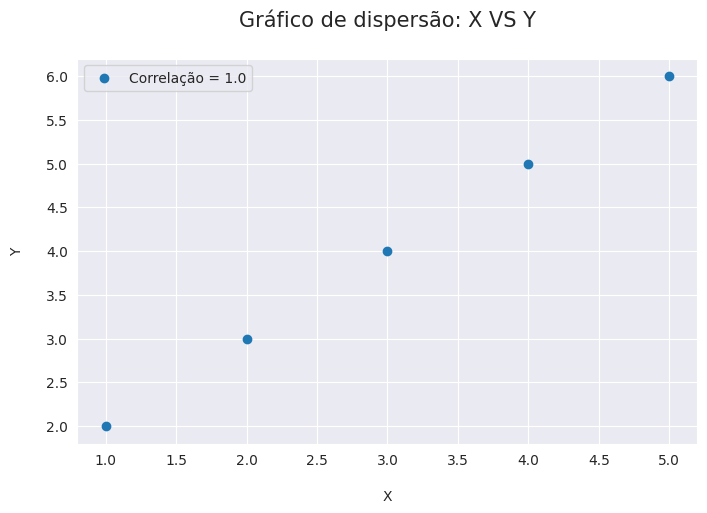

In [5]:
# gráfico de dispersão: "X" VS "Y" --> col_X VS col_y
col_X = dados['X']
col_y = dados['Y']

plt.rcParams.update({'figure.figsize': (8, 5),
                     'figure.dpi': 100})

plt.scatter(x=col_X, y=col_y,
            label=f'Correlação = {np.round(np.corrcoef(col_X, col_y)[0, 1], 4)}')

plt.title('Gráfico de dispersão: X VS Y\n', size=15)
plt.xlabel('\nX')
plt.ylabel('Y\n')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
dados_2 = dados.copy()

# realizando as operações necessárias para posteriormente realizar o cálculo do coeficiente de correlação
dados_2['X.Y'] = dados_2['X'] * dados_2['Y']
dados_2['X²'] = round(dados_2['X'] ** 2, 2)
dados_2['Y²'] = round(dados_2['Y'] ** 2, 2)

dados_2

,X,Y,X.Y,X²,Y²
0,1,2,2,1,4
1,2,3,6,4,9
2,3,4,12,9,16
3,4,5,20,16,25
4,5,6,30,25,36


In [7]:
# instanciando o valor de significância
significancia = 0.05

In [8]:
# a biblioteca "scipy" fornece recursos para cálculo do coeficiente de correlação e do p-valor
from scipy import stats

# utilizando a função pearson
correlation, p_value = stats.pearsonr(x=dados['X'], y=dados['Y'])

print('Correlation:', correlation)
print('P-Value:', p_value)
p_value <= significancia

Correlation: 1.0
P-Value: 0.0


True

In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x=dados['X'],
                                                               y=dados['Y'])

print('Slope    :', slope)          # coeficiente angular
print('Intercept:', intercept)      # coeficiente linear
print('R-Value  :', r_value)        # coeficiente de correlação
print('P-Value  :', p_value)        # p-valor
print('Std-Error:', std_err)        # valor de erro (desvio-padrão)

Slope    : 1.0
Intercept: 1.0
R-Value  : 1.0
P-Value  : 1.2004217548761408e-30
Std-Error: 0.0


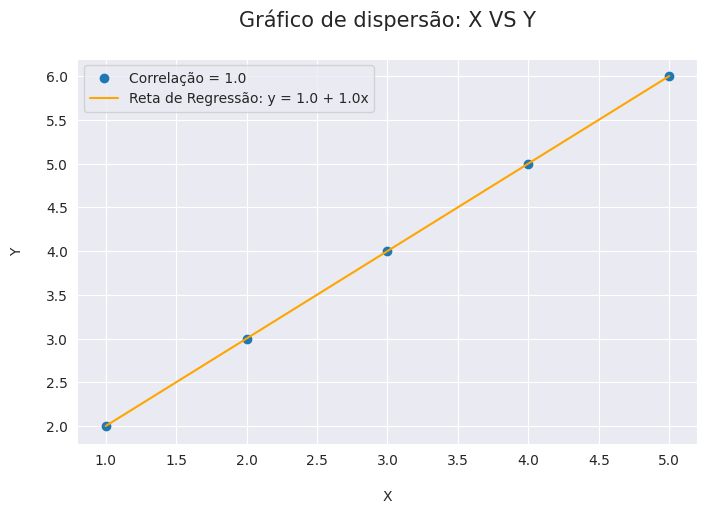

In [10]:
# gráfico de dispersão com a reta de regressão
plt.rcParams.update({'figure.figsize': (8, 5),
                     'figure.dpi': 100})

plt.scatter(x=col_X, y=col_y,
            label=f'Correlação = {np.round(np.corrcoef(col_X, col_y)[0, 1], 4)}')

x_vals = np.linspace(min(col_X), max(col_X))
y_vals = slope * x_vals + intercept

plt.plot(x_vals, y_vals, color='orange',
         label=f'Reta de Regressão: y = {round(intercept, 2)} + {round(slope, 2)}x')

plt.title('Gráfico de dispersão: X VS Y\n', size=15)
plt.xlabel('\nX')
plt.ylabel('Y\n')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
data_dict = {
    'X': [1, 2, 3, 4],
    'Y': [2, 4, 5, 6]
}

df = pd.DataFrame(data=data_dict)
df

,X,Y
0,1,2
1,2,4
2,3,5
3,4,6


In [12]:
df_2 = df.copy()

# realizando as operações necessárias para posteriormente realizar o cálculo do coeficiente de correlação
df_2['X.Y'] = df_2['X'] * df_2['Y']
df_2['X²'] = round(df_2['X'] ** 2, 2)
df_2['Y²'] = round(df_2['Y'] ** 2, 2)

df_2

,X,Y,X.Y,X²,Y²
0,1,2,2,1,4
1,2,4,8,4,16
2,3,5,15,9,25
3,4,6,24,16,36


In [13]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x=df['X'],
                                                               y=df['Y'])

print('Slope    :', slope)          # coeficiente angular
print('Intercept:', intercept)      # coeficiente linear
print('R-Value  :', r_value)        # coeficiente de correlação
print('P-Value  :', p_value)        # p-valor
print('Std-Error:', std_err)        # valor de erro (desvio-padrão)

Slope    : 1.3
Intercept: 1.0
R-Value  : 0.9827076298239908
P-Value  : 0.017292370176009153
Std-Error: 0.17320508075688734


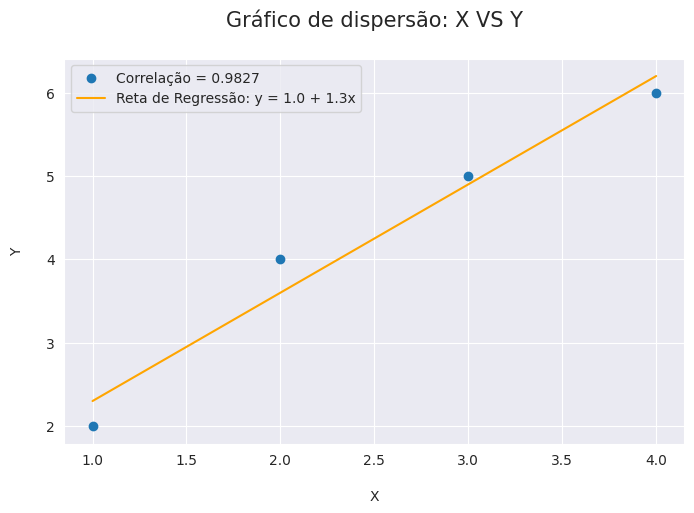

In [14]:
# gráfico de dispersão: "X" VS "Y" --> col_X VS col_y
col_X = df['X']
col_y = df['Y']

plt.rcParams.update({'figure.figsize': (8, 5),
                     'figure.dpi': 100})

plt.scatter(x=col_X, y=col_y,
            label=f'Correlação = {np.round(np.corrcoef(col_X, col_y)[0, 1], 4)}')

x_vals = np.linspace(min(col_X), max(col_X))
y_vals = slope * x_vals + intercept

plt.plot(x_vals, y_vals, color='orange',
         label=f'Reta de Regressão: y = {round(intercept, 4)} + {round(slope, 4)}x')

plt.title('Gráfico de dispersão: X VS Y\n', size=15)
plt.xlabel('\nX')
plt.ylabel('Y\n')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
infos = {
    'idade': [30, 41, 56, 44, 25],
    'anos_estudo': [7, 10, 21, 12, 11],
    'sexo': ['F', 'M', 'F', 'M', 'M'],
    'altura_cm': [191, 163, 172, 188, 165],
    'salario_anual': [100_000, 50_000, 120_000, 110_000, 70_000],
}

import pandas as pd
df = pd.DataFrame(data=infos)
df

,idade,anos_estudo,sexo,altura_cm,salario_anual
0,30,7,F,191,100000
1,41,10,M,163,50000
2,56,21,F,172,120000
3,44,12,M,188,110000
4,25,11,M,165,70000


In [17]:
df2 = df.copy()

# df2['salario_anual_mil'] = df2['salario_anual'] / 1000
df2['sexo'] = df2['sexo'].replace({'M': 0, 'F': 1})

df2

,idade,anos_estudo,sexo,altura_cm,salario_anual
0,30,7,1,191,100000
1,41,10,0,163,50000
2,56,21,1,172,120000
3,44,12,0,188,110000
4,25,11,0,165,70000


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr_model = LinearRegression(n_jobs=-1)
lr_model

LinearRegression(n_jobs=-1)

In [20]:
lr_model.fit(X=df2[['idade', 'anos_estudo', 'sexo', 'altura_cm']],
             y=df2['salario_anual'])

LinearRegression(n_jobs=-1)

In [21]:
lr_model.coef_, lr_model.intercept_

(array([-655.54749819, 5421.31979695, 1794.05366207, 2044.96011603]),
 -310664.2494561275)

In [22]:
lr_model.predict(X=[[30, 7, 0, 191]])

array([98205.94633793])

In [23]:
lr_model.predict(X=[[43, 12, 1, 168]])

array([71550.39883974])

In [24]:
lr_model.score(X=df2[['idade', 'anos_estudo', 'sexo', 'altura_cm']],
               y=df2['salario_anual'])

1.0

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
print('MSE:', mean_squared_error(y_true=df2['salario_anual'],
                                  y_pred=lr_model.predict(X=df2[['idade', 'anos_estudo', 'sexo', 'altura_cm']])))

MSE: 2.0328790734103207e-21


In [27]:
print('R2:', r2_score(y_true=df2['salario_anual'],
                      y_pred=lr_model.predict(X=df2[['idade', 'anos_estudo', 'sexo', 'altura_cm']])))

R2: 1.0


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scal = StandardScaler()
scal

StandardScaler()

In [30]:
X = df2[['idade', 'anos_estudo', 'sexo', 'altura_cm']]
y = df2['salario_anual']

In [31]:
X_scaled = scal.fit_transform(X=X)
X_scaled

array([[-0.84350439, -1.10463415,  1.22474487,  1.30840156],
       [ 0.16503347, -0.46734522, -0.81649658, -1.10181184],
       [ 1.54031237,  1.86938087,  1.22474487, -0.32710039],
       [ 0.44008925, -0.04248593, -0.81649658,  1.05016441],
       [-1.3019307 , -0.25491557, -0.81649658, -0.92965374]])

In [32]:
lr_model.fit(X=X_scaled, y=y)
lr_model.coef_, lr_model.intercept_

(array([-7149.97695536, 25520.54264378,   878.90320865, 23756.76911542]),
 90000.00000000001)

In [33]:
lr_model.predict(X=[[30, 7, 0, 191]])

array([4591687.39089134])

In [34]:
lr_model.predict(X=[[43, 12, 1, 168]])

array([4080813.61724444])

In [35]:
lr_model.score(X=X_scaled, y=y)

1.0

In [36]:
import statsmodels.api as sm

In [37]:
y = df2['salario_anual']
X = sm.add_constant(X)

In [38]:
model = sm.OLS(endog=y, exog=X)
model

In [39]:
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          salario_anual   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 29 Jun 2024   Prob (F-statistic):                nan
Time:                        23:12:24   Log-Likelihood:                 104.78
No. Observations:                   5   AIC:                            -199.6
Df Residuals:                       0   BIC:                            -201.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.107e+05        inf         -0      

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [40]:
model = sm.OLS(endog=y, exog=X_scaled)
model

In [41]:
res = model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:          salario_anual   R-squared (uncentered):                   0.077
Model:                            OLS   Adj. R-squared (uncentered):             -3.613
Method:                 Least Squares   F-statistic:                            0.02099
Date:                Sat, 29 Jun 2024   Prob (F-statistic):                       0.998
Time:                        23:12:29   Log-Likelihood:                         -64.133
No. Observations:                   5   AIC:                                      136.3
Df Residuals:                       1   BIC:                                      134.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [42]:
df2 = df.copy()

df2 = pd.get_dummies(data=df2, columns=['sexo'], dtype=int)
df2

,idade,anos_estudo,altura_cm,salario_anual,sexo_F,sexo_M
0,30,7,191,100000,1,0
1,41,10,163,50000,0,1
2,56,21,172,120000,1,0
3,44,12,188,110000,0,1
4,25,11,165,70000,0,1


In [43]:
X = df2.drop(columns=['salario_anual'])
y = df2['salario_anual']

In [44]:
X.head()

,idade,anos_estudo,altura_cm,sexo_F,sexo_M
0,30,7,191,1,0
1,41,10,163,0,1
2,56,21,172,1,0
3,44,12,188,0,1
4,25,11,165,0,1


In [45]:
X_tranformed = X.iloc[:, :-2].apply(lambda x : np.log10(x+1))
X_tranformed.head()

,idade,anos_estudo,altura_cm
0,1.491362,0.903090,2.283301
1,1.623249,1.041393,2.214844
2,1.755875,1.342423,2.238046
3,1.653213,1.113943,2.276462
4,1.414973,1.079181,2.220108


In [46]:
X_final = pd.concat([X_tranformed, X.iloc[:, -2:]], axis=1)
X_final.head()

,idade,anos_estudo,altura_cm,sexo_F,sexo_M
0,1.491362,0.903090,2.283301,1,0
1,1.623249,1.041393,2.214844,0,1
2,1.755875,1.342423,2.238046,1,0
3,1.653213,1.113943,2.276462,0,1
4,1.414973,1.079181,2.220108,0,1


In [47]:
X = sm.add_constant(X_final)
y = df2['salario_anual']

In [48]:
model = sm.OLS(endog=y, exog=X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          salario_anual   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 29 Jun 2024   Prob (F-statistic):                nan
Time:                        23:12:55   Log-Likelihood:                 95.164
No. Observations:                   5   AIC:                            -180.3
Df Residuals:                       0   BIC:                            -182.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.22e+06        inf         -0      

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


**Dataset:**
- https://www.kaggle.com/datasets/gunhee/koreahousedata?resource=download

In [49]:
from google.colab import files
uploaded = files.upload()

Saving Daegu_Real_Estate_data.csv to Daegu_Real_Estate_data.csv


In [50]:
%ls

Daegu_Real_Estate_data.csv  sample_data/


In [51]:
!head -n 5 Daegu_Real_Estate_data.csv

SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_APT,N_manager,N_elevators,SubwayStation,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,3.0,0.0,Kyungbuk_uni_hospital,2.0,1,1.0,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,1.0,2.0,2.0,Daegu,5.0,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,1.0,2.0,2.0,

In [52]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             r2_score)

In [54]:
df = pd.read_csv(filepath_or_buffer='Daegu_Real_Estate_data.csv')
df.shape

(5891, 30)

In [56]:
df.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   HallwayType                         5891 non-null   object 
 7   HeatingType                         5891 non-null   object 
 8   AptManageType                       5891 non-null   object 
 9   N_Parkinglot(Ground)                5891 non-null   float64
 10  N_Parkinglot(Basement)              5891 non-null   float64
 11  TimeToBusStop                       5891 no

In [59]:
cat_vars = df.select_dtypes(include=['object']).columns
cat_vars

Index(['HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop',
       'TimeToSubway', 'SubwayStation'],
      dtype='object')

In [61]:
df_dummies = pd.get_dummies(data=df[cat_vars], dtype=int, drop_first=True)
df_dummies.head()

,HallwayType_mixed,HallwayType_terraced,HeatingType_individual_heating,AptManageType_self_management,TimeToBusStop_10min~15min,TimeToBusStop_5min~10min,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [62]:
df_numbers = df.select_dtypes(exclude=['object'])
df_numbers.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,111.0,184.0,3.0,3.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,80.0,76.0,1.0,2.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,80.0,76.0,1.0,2.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,249.0,536.0,6.0,5.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,523.0,536.0,8.0,8.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0


In [63]:
df_numbers = df_numbers.loc[:, 'YearBuilt':'N_SchoolNearBy(Total)'].apply(lambda x : np.log10(x+1))
df_numbers.head()

,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,3.302547,3.302764,0.954243,2.911158,0.602060,2.049218,2.267172,0.602060,0.602060,0.000000,...,0.30103,0.301030,0.00000,0.602060,0.477121,0.477121,0.477121,0.778151,0.845098,1.000000
1,3.297979,3.302764,0.954243,2.769377,0.954243,1.908485,1.886491,0.301030,0.477121,0.477121,...,0.30103,0.477121,0.30103,0.477121,0.301030,0.301030,0.000000,0.602060,1.113943,0.698970
2,3.297979,3.302764,0.954243,2.769377,0.845098,1.908485,1.886491,0.301030,0.477121,0.477121,...,0.30103,0.477121,0.30103,0.477121,0.301030,0.301030,0.000000,0.602060,1.113943,0.698970
3,3.302547,3.302764,0.954243,3.313234,0.954243,2.397940,2.729974,0.845098,0.778151,1.079181,...,0.30103,0.000000,0.00000,0.477121,0.477121,0.301030,0.477121,0.778151,0.602060,0.903090
4,3.299725,3.302764,0.954243,3.246006,0.602060,2.719331,2.729974,0.954243,0.954243,1.322219,...,0.30103,0.778151,0.00000,0.698970,0.602060,0.778151,0.778151,0.698970,1.176091,1.255273


In [64]:
X = pd.concat([df_numbers, df_dummies], axis=1)
X.head()

,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,...,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
0,3.302547,3.302764,0.954243,2.911158,0.602060,2.049218,2.267172,0.602060,0.602060,0.000000,...,0,0,0,0,0,0,1,0,0,0
1,3.297979,3.302764,0.954243,2.769377,0.954243,1.908485,1.886491,0.301030,0.477121,0.477121,...,0,1,0,0,0,1,0,0,0,0
2,3.297979,3.302764,0.954243,2.769377,0.845098,1.908485,1.886491,0.301030,0.477121,0.477121,...,0,1,0,0,0,1,0,0,0,0
3,3.302547,3.302764,0.954243,3.313234,0.954243,2.397940,2.729974,0.845098,0.778151,1.079181,...,0,0,0,0,0,0,0,0,1,0
4,3.299725,3.302764,0.954243,3.246006,0.602060,2.719331,2.729974,0.954243,0.954243,1.322219,...,1,0,0,0,0,0,0,1,0,0


In [65]:
y = df['SalePrice']
y[:5]

0    141592
1     51327
2     48672
3    380530
4    221238
Name: SalePrice, dtype: int64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=1234)

In [67]:
model = LinearRegression()
model

LinearRegression()

In [68]:
model.fit(X=X_train, y=y_train)

pred_train = model.predict(X=X_train)
pred_test = model.predict(X=X_test)

<font size=5>**Métricas para avaliar o seu modelo de regressão: dominando a arte da previsão**</font>

No mundo da inteligência artificial, os modelos de regressão reinam como reis da previsão de valores contínuos. Mas, como saber se o seu modelo está realmente mandando bem? É aí que entram as métricas de avaliação!

Para análise preditiva, conhecer as métricas certas é fundamental para:

* **Desvendar a precisão do seu modelo:** descobrir o quão perto as suas previsões estão da realidade.
* **Identificar áreas para aprimoramento:** entender onde o seu modelo precisa de ajustes para se tornar ainda mais preciso.
* **Escolher o melhor modelo para o seu problema:** comparar diferentes modelos e escolher o que melhor se encaixa nas suas necessidades.

As principais métricas de avaliação de modelos de regressão:

**1. Erro Médio Absoluto (MAE):** a soma da distância absoluta entre os valores previstos e os valores reais. Quanto menor o MAE, melhor o modelo. Imagine um amigo que sempre te dá um presente, mas nem sempre acerta o que você queria. O MAE seria a média da diferença de valor entre os presentes e o que você realmente desejava.

**2. Erro Quadrático Médio (MSE):** a média dos quadrados da distância entre os valores previstos e os valores reais. Ele penaliza mais erros maiores, dando mais peso a eles. É como ter um amigo que te dá presentes caros, mas nem sempre acerta o que você queria. O MSE seria a média do quadrado da diferença de valor entre os presentes e o que você realmente desejava, dando mais peso aos presentes mais caros.

**3. Raiz Quadrada do Erro Quadrático Médio (RMSE):** a raiz quadrada do MSE. É útil para ter uma ideia da magnitude do erro em unidades da variável original. Imagine ter um amigo que te dá presentes, mas nem sempre acerta o que você queria, e você calcula a diferença de valor entre os presentes e o que você realmente desejava. O RMSE seria a média da raiz quadrada dessa diferença de valor, te dando uma ideia do erro em reais, por exemplo.

**4. Coeficiente de Determinação (R²):** indica a porcentagem da variabilidade da variável alvo explicada pelo modelo. Um R² alto significa que o modelo explica bem a variabilidade dos dados, enquanto um R² baixo significa que o modelo explica mal essa variabilidade. Imagine ter um amigo que te conhece muito bem e consegue prever o que você vai querer de presente. O R² seria a porcentagem das vezes que ele acerta o presente que você queria.

**5. Erro Percentual Absoluto Médio (MAPE):** o erro médio absoluto dividido pela média dos valores reais, expresso em porcentagem. É útil quando se trabalha com valores que possuem grande magnitude. Imagine ter um amigo rico que te dá presentes, mas nem sempre acerta o que você queria. O MAPE seria a média da diferença de valor entre os presentes e o que você realmente desejava, dividida pela média do valor dos presentes, te dando uma ideia do erro em porcentagem.

**Outras métricas importantes:**

* **Índice de Concordância de Lin's:** mede a concordância entre a ordem de classificação dos valores previstos e os valores reais.
* **Erro Mediano Absoluto (MAD):** a mediana da distância absoluta entre os valores previstos e os valores reais.
* **Escala de Brier:** mede a probabilidade de erro do modelo em previsões binárias.

**Lembre-se:**

* A escolha da métrica ideal depende do seu problema específico e dos seus objetivos.
* É importante analisar várias métricas juntas para ter uma visão completa do desempenho do seu modelo.
* Não existe uma métrica única que seja perfeita para todos os casos.

Com essas dicas e as métricas em mãos, você estará pronto para desvendar os segredos da avaliação de modelos de regressão e construir modelos de previsão cada vez mais precisos e confiáveis!


In [75]:
mae_train = mean_absolute_error(y_true=y_train, y_pred=pred_train).round(4)
mae_test = mean_absolute_error(y_true=y_test, y_pred=pred_test).round(4)

mse_train = mean_squared_error(y_true=y_train, y_pred=pred_train).round(4)
mse_test = mean_squared_error(y_true=y_test, y_pred=pred_test).round(4)

rmse_train = mean_squared_error(y_true=y_train, y_pred=pred_train,
                                squared=False).round(4)
rmse_test = mean_squared_error(y_true=y_test, y_pred=pred_test,
                               squared=False).round(4)

mape_train = np.mean(np.abs((y_train - pred_train) / y_train)).round(4)
mape_test = np.mean(np.abs((y_test - pred_test) / y_test)).round(4)

r2_train = r2_score(y_true=y_train, y_pred=pred_train).round(4)
r2_test = r2_score(y_true=y_test, y_pred=pred_test).round(4)

In [76]:
data = {
    'dataset': ['train', 'test'],
    'mae': [mae_train, mae_test],
    'mse': [mse_train, mse_test],
    'rmse': [rmse_train, rmse_test],
    'mape': [mape_train, mape_test],
    'r2': [r2_train, r2_test]
}

df_metrics = pd.DataFrame(data=data)
# df_metrics.reset_index(drop=True, inplace=True)
df_metrics

,dataset,mae,mse,rmse,mape,r2
0,train,25970.1988,1.157700e+09,34024.9955,0.1511,0.8978
1,test,26579.2831,1.221003e+09,34942.8522,0.1561,0.8911
